<a href="https://colab.research.google.com/github/sookolls/Python/blob/master/2026_Sokol_Olga_TtansactionStatistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('deals_all_opt.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50422 entries, 0 to 50421
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   strategy_name  50422 non-null  object 
 1   signal_type    50422 non-null  object 
 2   instrument     50422 non-null  object 
 3   timeframe      50422 non-null  object 
 4   direction      50422 non-null  object 
 5   entry_date     50422 non-null  object 
 6   entry_price    50422 non-null  float64
 7   stop_price     50422 non-null  float64
 8   exit_date      50422 non-null  object 
 9   exit_price     50422 non-null  float64
 10  exit_type      50422 non-null  object 
 11  volume         50422 non-null  float64
 12  commission     50422 non-null  float64
 13  profit_abs     50422 non-null  float64
 14  profit_eq_pc   50422 non-null  float64
 15  start_equity   50422 non-null  float64
dtypes: float64(8), object(8)
memory usage: 6.2+ MB


In [28]:
df = df.sort_values(by =['exit_date'])

In [29]:
df.head()

,strategy_name,signal_type,instrument,timeframe,direction,entry_date,entry_price,stop_price,exit_date,exit_price,exit_type,volume,commission,profit_abs,profit_eq_pc,start_equity
0,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 02:30:00,19.613,19.36,2021-04-01 03:00:00,19.623,take_profit,8.510,0.166949,-0.081849,-0.000818,10000.000000
2,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Long,2021-04-01 04:30:00,1925.620,1915.33,2021-04-01 05:00:00,1915.280,stop,0.372,0.714407,-4.560887,-0.045609,9999.918151
3,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 04:30:00,20.217,19.51,2021-04-01 05:30:00,20.227,take_profit,3.040,0.061475,-0.031075,-0.000311,9999.918151
1,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Short,2021-04-01 03:00:00,1926.370,1944.77,2021-04-01 08:00:00,1944.820,stop,0.208,0.402604,-4.240204,-0.042402,10000.000000
4,SOL-USDT-SWAP_H1_RISE_FALL_False_True_False,RISE_FALL,SOL-USDT-SWAP,H1,Long,2021-04-01 05:00:00,20.234,19.51,2021-04-01 10:00:00,19.460,stop,2.790,0.055373,-2.214833,-0.022149,9999.918151


In [30]:
df['exit_date'].max()

'2025-12-04 14:00:00'

Среядняя ежегодная, ежемесячная, еженедельная доходность

In [31]:
df['exit_date'] = pd.to_datetime(df['exit_date'])
df['year'] = df['exit_date'].dt.year
yearly_returns = df.groupby('year')['profit_eq_pc'].sum()
yearly_returns

,profit_eq_pc
year,
2021,58.595342
2022,98.605350
2023,82.908981
2024,109.811258
2025,110.578540


In [32]:
avg_year_return = yearly_returns.mean()
avg_year_return


np.float64(92.09989416951571)

In [33]:
df['month'] = df['exit_date'].dt.month
month_returns = df.groupby([ 'year', 'month'])['profit_eq_pc'].sum()
month_returns.mean()

np.float64(8.078938085045237)

In [34]:
df['week'] = df['exit_date'].dt.isocalendar().week
week_returns = df.groupby(['year', 'week'])['profit_eq_pc'].sum()
week_returns.mean()

np.float64(1.879589676928892)

Среднее количество сделок в год, месяц, неделю

In [35]:
df.groupby('year')['profit_eq_pc'].count().mean()

np.float64(10084.4)

In [36]:
df.groupby([ 'year', 'month'])['profit_eq_pc'].count().mean()

np.float64(884.5964912280701)

In [37]:
df.groupby(['year', 'week'])['profit_eq_pc'].count().mean()

np.float64(205.80408163265307)

Процент прибыльных сделок

In [38]:
profit_deals = df[df['profit_eq_pc']>0].shape[0]
percent_profit = profit_deals/df.shape[0]*100
percent_profit

39.490698504620994

Процент на покупку и продажу

In [39]:
long_deals = df[df['direction']== 'Long'].shape[0]
percent_long = long_deals/df.shape[0] *100
percent_long

46.313117290071794

In [40]:
short_deals = df[df['direction']== 'Short'].shape[0]
percent_short = short_deals/df.shape[0] *100
percent_short

53.686882709928206

In [41]:
direction_pct = df['direction'].value_counts(normalize=True) * 100
direction_pct


,proportion
direction,
Short,53.686883
Long,46.313117


Средняя pnl прибыльной сделки

In [42]:
df.loc[df['profit_eq_pc']>0, 'profit_eq_pc'].mean()

np.float64(0.06238721124030718)

Средняя pnl убыточной сделки

In [43]:
df.loc[df['profit_eq_pc']<0, 'profit_eq_pc'].mean()

np.float64(-0.025622900012108096)

Максимальная прибыльная сделка, Максимальная убыточная сделка

In [44]:
df['profit_eq_pc'].min()
df['profit_eq_pc'].max()

1.4254618771650245

In [45]:
df['profit_eq_pc'].min()

-1.4437894987983595

Максимальная просадка

In [60]:
cum_pnl = df['profit_eq_pc'].cumsum()
cum_pnl

,profit_eq_pc
0,-0.000818
2,-0.046428
3,-0.046738
1,-0.089141
4,-0.111289
...,...
50367,460.391789
50330,460.433252
50332,460.462737
50371,460.463832


In [47]:
def drawdown(r):
    max_draw = 0
    max_cumpnl = r.iloc[0]
    for  value in r:
        if value > max_cumpnl:
            max_cumpnl = value
        draw = max_cumpnl - value
        if draw > max_draw:
            max_draw = draw
    return max_draw
drawdown(cum_pnl)

8.160260585669505

Среднее и стандартное отклонение ежегодной, ежемесячной, еженедельной pnl

In [48]:
print(yearly_returns.std(), yearly_returns.mean())

21.82029801763789 92.09989416951571


In [49]:
print(month_returns.std(), month_returns.mean())

5.250058092690041 8.078938085045237


In [50]:
print(week_returns.std(), week_returns.mean())

4.016461477032115 1.879589676928892


Коэффициенты Шарпа, Сортино

In [51]:
def get_sharpe(r):
    return r.mean()/r.std() * np.sqrt(12)
get_sharpe(month_returns)

np.float64(5.330657675573155)

In [52]:
def get_sortino(r):
  r_negative = r[r<0]
  return (r.mean()-0)/r_negative.std() * np.sqrt(12)
get_sortino(month_returns)

np.float64(8.164359522350187)

График кумулятивной pnl

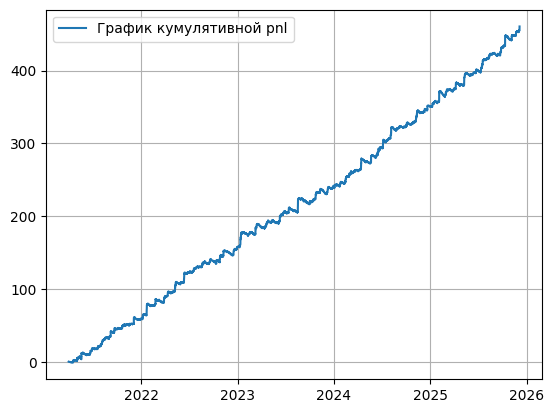

In [53]:
plt.plot( df['exit_date'],cum_pnl, label='График кумулятивной pnl')
plt.legend()
plt.grid()
plt.show()

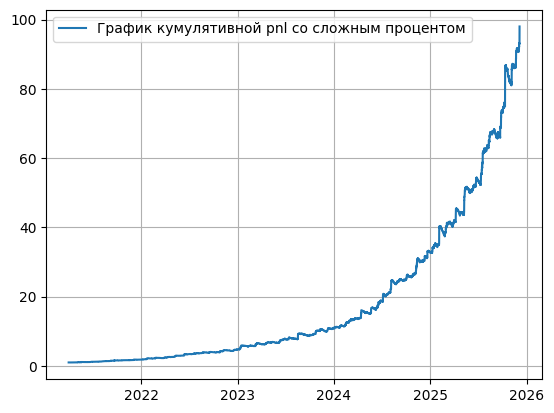

In [54]:
cum_pnl_w_percent = (1+df['profit_eq_pc']/100).cumprod()
plt.plot( df['exit_date'],cum_pnl_w_percent, label='График кумулятивной pnl со сложным процентом')
plt.legend()
plt.grid()
plt.show()

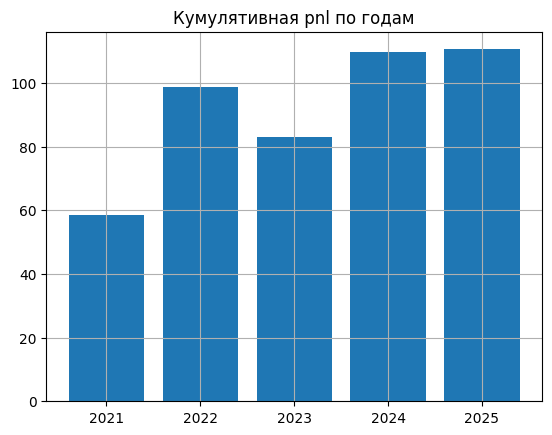

In [55]:
plt.bar(yearly_returns.index, yearly_returns.values)
plt.title('Кумулятивная pnl по годам')
plt.grid()
plt.show()

График просадок по годам

In [56]:
cum_pnl = df['profit_eq_pc'].cumsum()
def drawdown(r):
    max_draw = 0
    max_cumpnl = r.iloc[0]
    for  value in r:
        if value > max_cumpnl:
            max_cumpnl = value
        draw = max_cumpnl - value
        if draw > max_draw:
            max_draw = draw
    return max_draw
drawdown(cum_pnl)

8.160260585669505

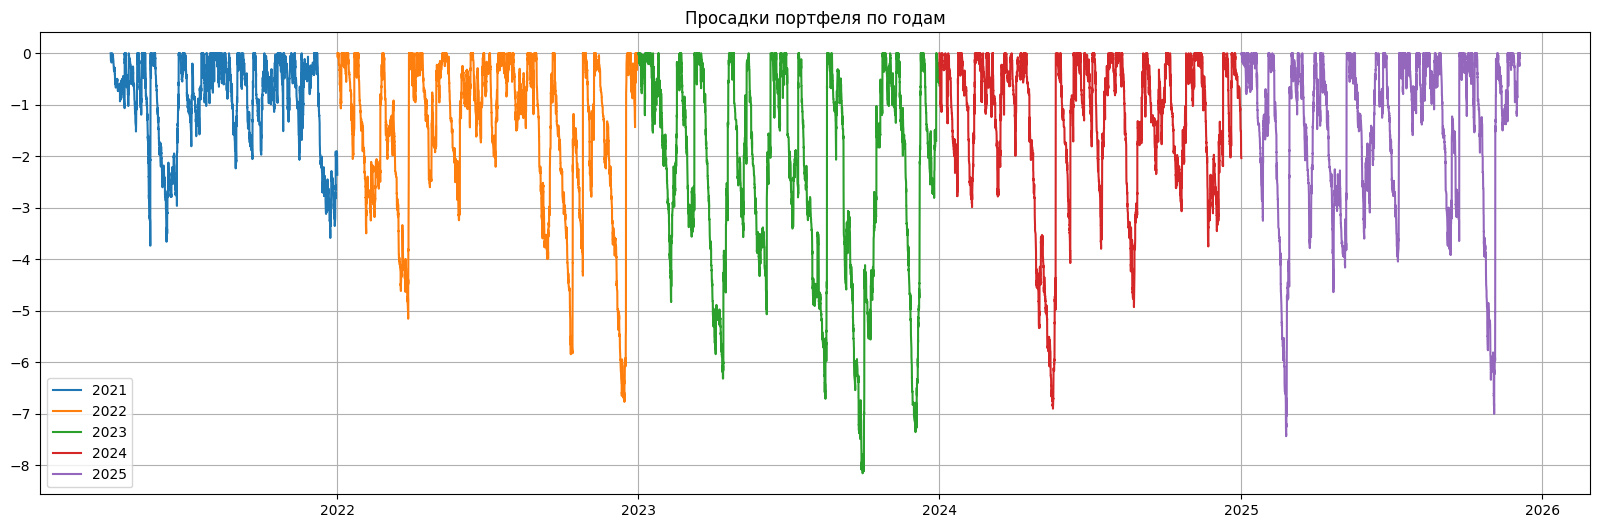

In [57]:
def get_drawdown(cum_pnl):
    max_pnl = cum_pnl.cummax()
    drawdown = cum_pnl - max_pnl
    return drawdown

years = sorted(df['year'].unique())
plt.figure(figsize=(20,6))
for y in years:
    df_year = df[df['year'] == y]
    cum_pnl_year = df_year['profit_eq_pc'].cumsum()
    drawdown_year = get_drawdown(cum_pnl_year)
    plt.plot(df_year['exit_date'], drawdown_year, label=str(y))
plt.title('Просадки портфеля по годам')
plt.legend()
plt.grid(True)
plt.show()


Ежегодная, ежемесячная доходность

In [58]:
for y in years:
    df_year = df[df['year'] == y]
    cum_pnl_year = df_year['profit_eq_pc'].sum()
    print(y, cum_pnl_year)

2021 58.595341771054365
2022 98.60534989024302
2023 82.90898127573941
2024 109.81125814373446
2025 110.57853976680732


In [59]:
for (y, m), r in month_returns.items():
    print(y, m, r)

2021 4 1.2660303043691683
2021 5 9.311317592581696
2021 6 7.995976927590217
2021 7 4.600198906568904
2021 8 9.252823530515963
2021 9 11.769967339902385
2021 10 6.501857085032216
2021 11 1.174597299175679
2021 12 6.722572785318135
2022 1 19.265585167584003
2022 2 6.597172802903407
2022 3 5.018231701299642
2022 4 6.6693669728699625
2022 5 12.99062202513122
2022 6 13.701176088816705
2022 7 7.420882790150635
2022 8 6.8638900566623935
2022 9 0.9270689725244613
2022 10 7.661759316581732
2022 11 3.33687404191521
2022 12 8.152719953803652
2023 1 18.683073684351065
2023 2 0.5614918454108586
2023 3 8.0927299941689
2023 4 7.473286696416175
2023 5 -0.7762823326928803
2023 6 14.209896381858417
2023 7 1.4432795578837847
2023 8 17.121410228728312
2023 9 -7.299061807488215
2023 10 16.14252444471466
2023 11 -2.2099314675813035
2023 12 9.466564049969623
2024 1 6.477914691417427
2024 2 11.949913925720786
2024 3 4.038845045413629
2024 4 11.191064526110635
2024 5 8.33796413869783
2024 6 12.248387083242557


In [ ]:
n_strategies = df['strategy_name'].nunique()
print(f"Количество стратегий {n_strategies}")


Количество стратегий 93


In [ ]:
strategy_stats = []
for strategy, df_s in df.groupby('strategy_name'):
    df_s = df_s.sort_values('exit_date')
    n_trades = len(df_s)

    cum_pnl = df_s['profit_eq_pc'].cumsum()

    mdd = get_drawdown(cum_pnl)

    sharpe = get_sharpe(month_returns)
    sortino = get_sortino(month_returns)

    strategy_stats.append({
        'strategy': strategy,
        'trades': n_trades,
        'cum_pnl': cum_pnl,
        'drawdown': mdd,
        'sharpe': sharpe,
        'sortino': sortino
    })
strategy_stats_df = pd.DataFrame(strategy_stats)
strategy_stats_df


,strategy,trades,cum_pnl%,drawdown,sharpe,sortino
0,AAVE-USDT-SWAP_H1_FAKE_REVERSAL_False_True_Fal...,447,12 0.004415 13 0.020422 38 0...,12 0.000000 13 0.000000 38 0...,5.330658,8.16436
1,AAVE-USDT-SWAP_H4_ENVELOPE_CROSS_False_True_Tr...,332,3460 -0.001649 3737 -0.003298 3424 0...,3460 0.000000 3737 -0.001649 3424 0...,5.330658,8.16436
2,ADA-USDT-SWAP_H1_ENVELOPE_BREAKTHROUGH_False_T...,449,304 -0.000336 309 -0.000671 316 -0...,304 0.000000 309 -0.000335 316 -0...,5.330658,8.16436
3,ADA-USDT-SWAP_H4_HHV_LLV_False_True_True,368,667 0.001576 853 0.003198 937 -0...,667 0.000000 853 0.000000 937 -0...,5.330658,8.16436
4,AVAX-USDT-SWAP_H1_RISE_FALL_False_True_False,398,10 -0.034519 30 -0.067836 336 -0...,10 0.000000 30 -0.033317 336 -0...,5.330658,8.16436
...,...,...,...,...,...,...
88,XLM-USDT-SWAP_H4_CONTRACTION_False_True_True_w,405,2628 -0.027411 2664 -0.053812 2820 -0...,2628 0.000000 2664 -0.026401 2820 -0...,5.330658,8.16436
89,XLM-USDT-SWAP_H4_ENVELOPE_BREAKTHROUGH_False_T...,373,594 -0.042753 615 -0.082103 671 -0...,594 0.000000 615 -0.039350 671 -0...,5.330658,8.16436
90,XLM-USDT-SWAP_H4_MA_CND_CROSS_False_True_True,346,1127 0.002958 1051 0.040302 1439 0...,1127 0.000000 1051 0.000000 1439 -0...,5.330658,8.16436
91,XLM-USDT-SWAP_M30_EMA_CROSS_False_True_True_w,529,173 0.002087 192 0.005261 239 0...,173 0.000000 192 0.000000 239 0...,5.330658,8.16436


In [ ]:
tickers = sorted(df['instrument'].unique())
tickers


['AAVE-USDT-SWAP',
 'ADA-USDT-SWAP',
 'AVAX-USDT-SWAP',
 'BAND-USDT-SWAP',
 'BTC-USDT-SWAP',
 'CFX-USDT-SWAP',
 'DOGE-USDT-SWAP',
 'EGLD-USDT-SWAP',
 'ETH-USDT-SWAP',
 'FIL-USDT-SWAP',
 'IMX-USDT-SWAP',
 'KSM-USDT-SWAP',
 'ONT-USDT-SWAP',
 'OP-USDT-SWAP',
 'RSR-USDT-SWAP',
 'RVN-USDT-SWAP',
 'SHIB-USDT-SWAP',
 'SOL-USDT-SWAP',
 'UMA-USDT-SWAP',
 'XLM-USDT-SWAP',
 'ZIL-USDT-SWAP']

In [2]:
!pip install python-okx pandas numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 kB 29.1 MB/s eta 0:00:00


In [3]:
from okx import MarketData
import time
import os
import requests

from datetime import datetime, timedelta, timezone

In [4]:
market = MarketData.MarketAPI(flag="0")

In [22]:
ticekrs = [
    'AAVE-USDT-SWAP', 'ADA-USDT-SWAP', 'AVAX-USDT-SWAP',
    'BAND-USDT-SWAP', 'BTC-USDT-SWAP', 'CFX-USDT-SWAP',
    'DOGE-USDT-SWAP', 'EGLD-USDT-SWAP', 'ETH-USDT-SWAP',
    'FIL-USDT-SWAP', 'IMX-USDT-SWAP', 'KSM-USDT-SWAP',
    'ONT-USDT-SWAP', 'OP-USDT-SWAP', 'RSR-USDT-SWAP',
    'RVN-USDT-SWAP', 'SHIB-USDT-SWAP', 'SOL-USDT-SWAP',
    'UMA-USDT-SWAP', 'XLM-USDT-SWAP', 'ZIL-USDT-SWAP'
]
# 'AAVE-USDT-SWAP',

In [7]:
interval = '15m'
start_time = '2021-01-01T00:00:00.000Z'
save_folder = 'okx_data'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

def fetch_candles_okx(symbol, interval, start_time, save_folder):
    all_data = []
    after = None
    request_count = 0

    print(f"Загрузка {symbol}...")

    while True:
        try:
            # данные через API
            if after:
                result = market.get_history_candlesticks(
                    instId=symbol,
                    bar=interval,
                    limit=100,
                    after=after
                )
            else:
                # Первый запрос
                result = market.get_history_candlesticks(
                    instId=symbol,
                    bar=interval,
                    limit=100
                )

            if result['code'] != '0':
                print(f"Ошибка API для {symbol}: {result}")
                break

            candles = result['data']
            if not candles:
                print(f"{symbol}: больше нет данных")
                break

            # Добавляем данные
            all_data.extend(candles)

            after = candles[-1][0]  # timestamp первой свечи

            # Периодическое сохранение
            request_count += 1
            if request_count % 10 == 0:
                df = pd.DataFrame(all_data, columns=['ts', 'o', 'h', 'l', 'c', 'vol', 'volCcy', 'volCcyQuote', 'confirm'])
                df['ts'] = df['ts'].astype(int)

                oldest_ts = int(df['ts'].min())
                start_ts = int(pd.Timestamp(start_time).timestamp() * 1000)

                if oldest_ts <= start_ts:
                    df = df[df['ts'] >= start_ts]
                    all_data = df.to_dict('records')

                    filename = f"{save_folder}/{symbol.replace('-', '_')}.csv"
                    df.to_csv(filename, index=False)
                    print(f"{symbol}: достигнута начальная дата")
                    break

                # промежуточный результат
                filename = f"{save_folder}/{symbol.replace('-', '_')}.csv"
                df.to_csv(filename, index=False)

                # Статистика
                total_candles = len(df)
                last_ts = int(df['ts'].max()) if total_candles > 0 else 0
                first_ts = int(df['ts'].min()) if total_candles > 0 else 0

                last_dt = datetime.fromtimestamp(last_ts/1000, tz=timezone.utc)
                first_dt = datetime.fromtimestamp(first_ts/1000, tz=timezone.utc)

                print(f"{symbol}: {total_candles} свечей | Первая: {first_dt} | Последняя: {last_dt}")

            # Задержка
            time.sleep(0.1)

        except Exception as e:
            print(f"Ошибка при загрузке {symbol}: {e}")
            time.sleep(1)
            continue

    # Финальное сохранение
    if all_data:
        df = pd.DataFrame(all_data, columns=['ts', 'o', 'h', 'l', 'c', 'vol', 'volCcy', 'volCcyQuote', 'confirm'])
        df['ts'] = df['ts'].astype(int)
        df = df.sort_values('ts')

        # Обрезаем по начальной дате
        start_ts = int(pd.Timestamp(start_time).timestamp() * 1000)
        df = df[df['ts'] >= start_ts]

        filename = f"{save_folder}/{symbol.replace('-', '_')}.csv"
        df.to_csv(filename, index=False)

        # Статистика
        total_candles = len(df)
        if total_candles > 0:
            first_ts = int(df['ts'].min())
            last_ts = int(df['ts'].max())

            first_dt = datetime.fromtimestamp(first_ts/1000, tz=timezone.utc)
            last_dt = datetime.fromtimestamp(last_ts/1000, tz=timezone.utc)

            print(f"\n{symbol}: ЗАГРУЖЕНО {total_candles} свечей")
            print(f"Первая свеча: {first_dt}")
            print(f"Последняя свеча: {last_dt}")
            print(f"Файл сохранен: {filename}\n")

    return all_data

In [ ]:
# Запуск загрузки
for i, ticker in enumerate(tickers, 1):
    print(f"\n{'='*60}")
    print(f"Загрузка тикера {i}/{len(tickers)}: {ticker}")
    print(f"{'='*60}")

    fetch_candles_okx(ticker, interval, start_time, save_folder)

    if i < len(tickers):
        time.sleep(1)

print("\n" + "="*60)
print("Загрузка завершена!")
print("="*60)


Загрузка тикера 1/21: AAVE-USDT-SWAP
Загрузка AAVE-USDT-SWAP...
AAVE-USDT-SWAP: 1000 свечей | Первая: 2026-01-22 08:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 2000 свечей | Первая: 2026-01-11 22:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 3000 свечей | Первая: 2026-01-01 12:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 4000 свечей | Первая: 2025-12-22 02:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 5000 свечей | Первая: 2025-12-11 16:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 6000 свечей | Первая: 2025-12-01 06:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 7000 свечей | Первая: 2025-11-20 20:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 8000 свечей | Первая: 2025-11-10 10:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USDT-SWAP: 9000 свечей | Первая: 2025-10-31 00:30:00+00:00 | Последняя: 2026-02-01 18:15:00+00:00
AAVE-USD

In [9]:
import pandas as pd
import os

save_folder = 'okx_data'
all_dfs = []

for filename in os.listdir(save_folder):
    if not filename.endswith('.csv'):
        continue

    tickers = filename.replace('.csv', '').replace('_', '-')
    filepath = os.path.join(save_folder, filename)

    df = pd.read_csv(filepath)

    # приводим типы
    df['ts'] = pd.to_datetime(df['ts'], unit='ms', utc=True)
    numeric_cols = ['o','h','l','c','vol','volCcy','volCcyQuote']
    df[numeric_cols] = df[numeric_cols].astype(float)

    # добавляем тикер
    df['tickers'] = tickers

    all_dfs.append(df)

# объединяем
merged_df = pd.concat(all_dfs, ignore_index=True)

# сортировка
merged_df = merged_df.sort_values(['ts', 'tickers']).reset_index(drop=True)

# сохраняем
merged_df.to_csv('okx_all_symbols_15m.csv', index=False)

print(f"Объединено свечей: {len(merged_df)}")
print("Файл: okx_all_symbols_15m.csv")


Объединено свечей: 3221196
Файл: okx_all_symbols_15m.csv


In [12]:
df = pd.read_csv('okx_all_symbols_15m.csv')
df['ts'] = pd.to_datetime(df['ts'], utc=True)


In [18]:
new_order = [df.columns[-1]] + list(df.columns[:-1])
df = df[new_order]
df

,tickers,ts,o,h,l,c,vol,volCcy,volCcyQuote,confirm
0,AAVE-USDT-SWAP,2021-01-01 00:00:00+00:00,88.290000,88.500000,85.710000,85.910000,46781.0,4678.1,4.077580e+05,1
1,ADA-USDT-SWAP,2021-01-01 00:00:00+00:00,0.181260,0.181540,0.178290,0.178650,9021.0,902100.0,1.622018e+05,1
2,AVAX-USDT-SWAP,2021-01-01 00:00:00+00:00,3.206000,3.255000,3.146000,3.236000,31414.0,31414.0,1.002381e+05,1
3,BAND-USDT-SWAP,2021-01-01 00:00:00+00:00,5.340000,5.360000,5.310000,5.320000,1642.0,1642.0,8.776093e+03,1
4,BTC-USDT-SWAP,2021-01-01 00:00:00+00:00,28914.200000,29017.900000,28683.100000,28765.600000,50200.0,502.0,1.448491e+07,1
...,...,...,...,...,...,...,...,...,...,...
3221191,UMA-USDT-SWAP,2026-02-01 21:15:00+00:00,0.556400,0.556900,0.554200,0.555400,43381.0,4338.1,2.412028e+03,1
3221192,ZIL-USDT-SWAP,2026-02-01 21:15:00+00:00,0.004031,0.004036,0.004016,0.004028,26216.0,2621600.0,1.055192e+04,1
3221193,UMA-USDT-SWAP,2026-02-01 21:30:00+00:00,0.556000,0.558500,0.555000,0.556000,41276.0,4127.6,2.299254e+03,1
3221194,ZIL-USDT-SWAP,2026-02-01 21:30:00+00:00,0.004027,0.004054,0.004020,0.004040,42862.0,4286200.0,1.730606e+04,1
